In [16]:
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import requests
from scipy.sparse import hstack
from scipy.special import expit

In [3]:
def download_data(url):
# data_url = 'https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/housing_scale'
    data = requests.get(url)
    file_name = url.split('/')[-1] + '.svm'
    with open(file_name, 'w') as f:
        f.write(data.text)
    return file_name

In [10]:
a9a = download_data('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a')
a9at = download_data('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a.t')

In [4]:
X, y = load_svmlight_file('a9a.svm')
X_test, y_test = load_svmlight_file('a9a.t.svm')

In [5]:
def sigmoid(z):  
#     return 1.0 / (1 + np.exp(-z))
# avoid overflow
    return expit(z)

In [31]:
def loss_fn(X, y, w):
    m = X.shape[0]
    h = sigmoid(X.dot(w))
#     if 0 in h or 1 in h:
#         print(h)
    j = np.sum(y*np.log(h)+(1-y)*np.log(1-h)) / m
    return -j

In [32]:
def logistic_regression(X, y, iterations, learning_rate, method='gd'):
    loss_history = []
    X0 = np.ones((X.shape[0], 1))
    X = hstack([X0, X])
    w = np.ones(X.shape[1])
    
    for i in range(iterations):
        if method == 'gd':
            h = sigmoid(X.dot(w))
            error = h - y
            loss = loss_fn(X, y, w)
            grad = X.T.dot(error)
            w -= learning_rate * grad
            
        loss_history.append(loss)
        
    return w, loss_history

In [51]:
le = LabelEncoder()
w, loss_history = logistic_regression(X, le.fit_transform(y), 200, 0.00001)
print(w)
print(loss_history)

[-2.06064938 -0.11764188  0.14323109  0.55436318  0.73188968  0.62750855
  0.02931533  0.22704978  0.86649515  0.89117691  0.47433904  0.64763758
  0.98951136  0.99839406  0.30181168  0.42104413  0.46820807  0.38118397
  0.36710278  0.8265559   0.46450332  0.72583252  0.27019589  1.09146844
  0.80574717  0.77879224  0.81003663  0.72460088  0.89547125  1.03250428
  0.89377803  0.76408053  1.07697847  0.8109897   0.96781538 -0.40739507
  0.27019589  0.46450332  0.58453941  1.02750708  1.05288532  0.19136073
 -0.51165487  0.66350397  0.73283322  0.80332696  1.0070953   1.00435011
  0.68961693  0.24010769  0.84992809  1.25239511  0.97252297  0.68772941
  0.63313203  0.56000543  0.60034995  0.76900603  0.94272242  0.92754654
  0.99611244  1.20065616  0.09949457  0.9380102  -0.01505114  0.64559931
  0.07064152 -0.19784534  0.39167562  0.84060352  0.81234999  0.09256684
 -0.72535531 -0.33529406 -1.63260945  0.57196007 -1.58760699  0.52695761
 -0.17524666  0.46467721  0.09360231  0.81348107  0

In [52]:
X0 = np.ones((X.shape[0], 1))
X1 = hstack([X0, X])
pred = np.round(sigmoid(X1.dot(w)))

In [53]:
from sklearn.metrics import accuracy_score
# pred = [1 if i == 1 else -1 for i in pred]
accuracy_score(pred, le.transform(y))

0.83047203709959772

In [54]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)
print(clf.score(X, y))
print (clf.intercept_, clf.coef_)

0.849175393876
[-0.61206205] [[-1.3812299  -0.41083569  0.19147326  0.49352529  0.49500499  0.26112624
  -0.13684575  0.50602223  0.6944782   0.00993066 -0.07159932 -0.83474086
  -0.12755718 -0.29047802 -0.0887569  -0.09352184 -0.08057406 -0.05873122
  -0.32426662 -0.06361783  0.18817062 -0.24061352  0.57384289  0.00456175
   0.01423259 -0.22180792 -0.42415565  0.52784434 -0.0083241  -0.359854
   0.09457389  0.73196836 -0.20224754 -0.90236931 -1.29984557 -0.24061352
  -0.06361783  0.01879434  0.97322052  1.27836531 -0.74750606 -0.9648665
  -0.80935508 -0.31733975 -0.65048546  1.5991255   0.79575943  0.17029333
  -0.63384905  0.4200784   0.89291027  0.65506285 -0.51461892 -0.23762375
   0.14879632 -0.68801672  0.02746823 -1.09165296  0.79262818 -0.3088642
   1.12823032 -0.816244   -0.3026011   0.09875712 -0.56924983 -0.15095457
   0.05035012  0.18399847 -0.43008574 -0.31387284 -0.10245206 -0.71385645
   0.1017944  -1.1317544   0.51969235 -0.84327508  0.23121303 -1.06461522
  -0.21084039

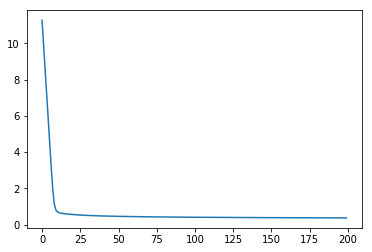

[11.273179998909137, 9.9157187469758696, 8.5582710339591852, 7.2009062779053039, 5.8440628470723377, 4.4905602848708419, 3.1583964877403465, 1.9464784302309945, 1.1351014897235654, 0.81188632114652837, 0.70188121542836157, 0.6555483981876733, 0.63061946479387521, 0.61416015108906219, 0.6015648738347672, 0.5909930409798223, 0.58164142689565423, 0.57313123641561858, 0.56526848744790414, 0.55794365824971515, 0.55108756308437434, 0.5446512611857891, 0.5385966604658996, 0.53289201529279862, 0.52750970726215185, 0.52242510550386867, 0.51761594324344617, 0.51306194453885223, 0.50874457490744873, 0.50464685578492474, 0.50075321420765706, 0.49704935401851191, 0.49352214192599275, 0.49015950503382932, 0.48695033797972587, 0.48388441852057634, 0.48095233072331672, 0.47814539507452952, 0.47545560490387456, 0.47287556856916041, 0.47039845689259985, 0.46801795537562535, 0.46572822075593823, 0.46352384150564785, 0.46139980190322916, 0.45935144934424899, 0.45737446458609043, 0.45546483465009774, 0.453

In [55]:
plt.plot(loss_history)
plt.show()
print(loss_history)